<a href="https://colab.research.google.com/github/wnoyan/Machine-Learning/blob/master/Applying%20Decision%20Tree%20Classifier%20on%20Iris%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loading Required Libraries

In [ ]:
# Loading Required Libraries
import numpy as np 
import pandas as pd 
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn import tree

## Exploring Iris Dataset

In [ ]:
# Loading Datasets 
iris_data = load_iris() 
iris = pd.DataFrame(iris_data.data)
iris_targets = pd.DataFrame(iris_data.target)

# Priting Features Name of Iris Data 
print ("Features Name : ", iris_data.feature_names) 

# Priting Targets Name of Iris Data 
print ("Targets Name : ", iris_data.target_names) 

# Shape of Datasets 
print ("Dataset Shape: ", iris.shape) 

# First Five Sample features
print ("Dataset: ",iris.head())  

# First Five Sample Targets
print ("Dataset: ",iris_targets.head())

Features Name :  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets Name :  ['setosa' 'versicolor' 'virginica']
Dataset Shape:  (150, 4)
Dataset:       0    1    2    3
0  5.1  3.5  1.4  0.2
1  4.9  3.0  1.4  0.2
2  4.7  3.2  1.3  0.2
3  4.6  3.1  1.5  0.2
4  5.0  3.6  1.4  0.2
Dataset:     0
0  0
1  0
2  0
3  0
4  0


## Splitting Dataset into training and testing sets

In [ ]:
# Features and Targets
X = iris_data.data
Y = iris_data.target

# Splitting the Dataset into Training and Testing sets 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

## Building Decision Tree Classifier

In [ ]:
# Decision tree classifier 
DT = DecisionTreeClassifier(criterion='entropy')

# Fitting the Training Data
DT.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Prediction

In [ ]:
# Prediction on Random Data
X = [[6.4,1.8 ,6.6 ,2.1]]
Y_pred = DT.predict(X)
print(Y_pred)

# Prediction on X_test (Testing Data )
Y_pred = DT.predict(X_test)
print(Y_pred)

[2]
[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


##Getting Accuracy && Confusion Matrix 

In [ ]:
# Accuray of the Model 
print("Accuracy:", accuracy_score(y_test, Y_pred)*100, "%")

# Confusion Matrix
cm = np.array(confusion_matrix(y_test, Y_pred))
cm

Accuracy: 100.0 %


array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]])

## Ploting Decision Tree

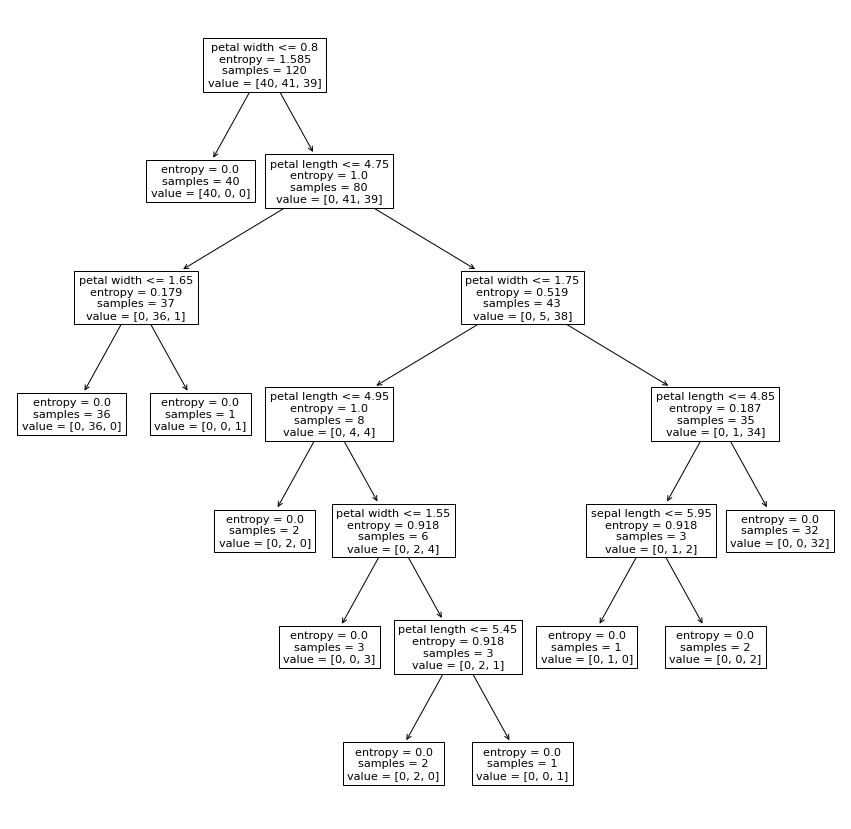

In [ ]:
# Plot Decision Tree
fig, ax = plt.subplots(figsize=(15, 15)) #figsize value changes the size of plot
tree.plot_tree(DT, ax=ax, feature_names = ['sepal length','sepal width','petal length','petal width'])
plt.show()

## Graphical View of Decision Tree

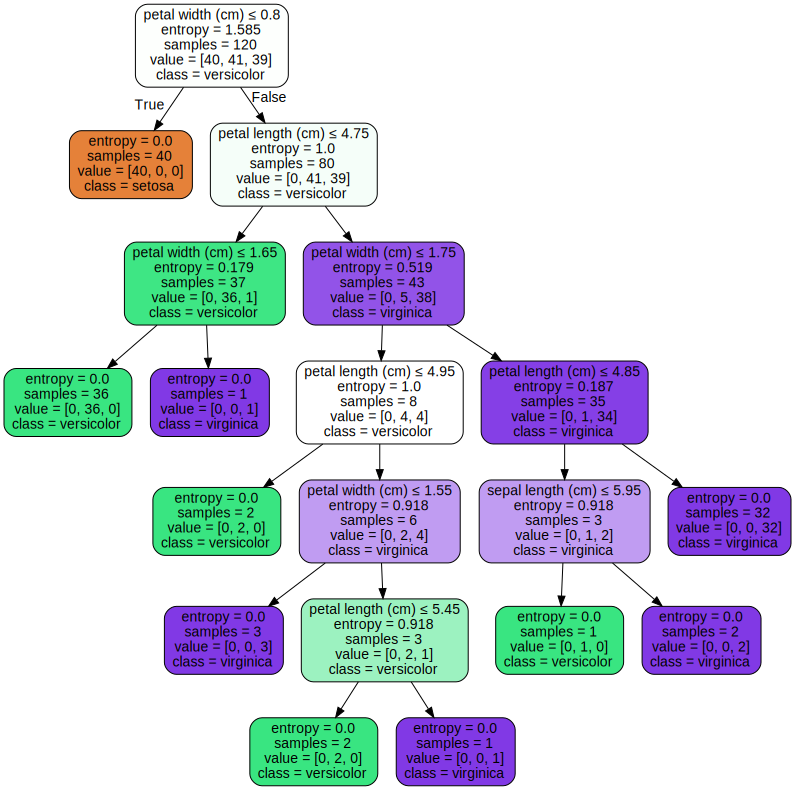

In [ ]:
# Graphical View of Decision Tree
import graphviz 
dot_data = tree.export_graphviz(DT, out_file=None, 
                      feature_names=iris_data.feature_names,  
                      class_names=iris_data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 